In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
fastai.__version__

'1.0.61'

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from fastai.imports import *
from fastai.vision import *
# from fastai.vision.all import *
import time

In [4]:
#checking path
base_path = 'C:/Users/user/Documents/GitHub/GroceryCV/GroceryStoreDataset-master/dataset'
p_path=Path(base_path)

train_path = base_path+'/train'
test_path = base_path+'/test'

In [5]:
data = ImageDataBunch.from_folder(path = p_path,
                                 train = 'train',
                                 valid = 'test',
                                 seed = 42,
                                 ds_tfms = get_transforms(),
                                 bs = 50,
                                 size = 150)
data.normalize(imagenet_stats)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:3657

ImageDataBunch;

Train: LabelList (1239 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
Apple,Apple,Apple,Apple,Apple
Path: C:\Users\user\Documents\GitHub\GroceryCV\GroceryStoreDataset-master\dataset;

Valid: LabelList (165 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
Apple,Apple,Apple,Asparagus,Asparagus
Path: C:\Users\user\Documents\GitHub\GroceryCV\GroceryStoreDataset-master\dataset;

Test: None

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:3657

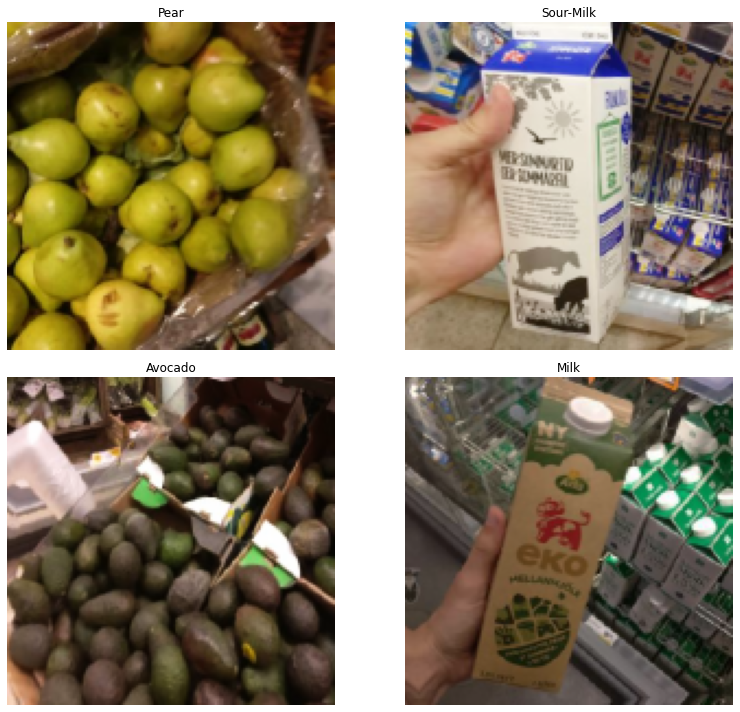

In [6]:
data.show_batch(rows = 2, figsize = (12,10))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
start = time.time()
learn.fit_one_cycle(10)
end = time.time()
print("Time taken:", end - start)

epoch,train_loss,valid_loss,error_rate,time
0,4.608015,2.886258,0.769697,00:44
1,2.922418,1.713335,0.484848,00:41
2,1.852875,1.375422,0.345455,00:40
3,1.219195,1.255022,0.321212,00:41
4,0.835912,1.129996,0.315152,00:40
5,0.613938,1.080130,0.309091,00:41
6,0.464524,1.070104,0.290909,00:43
7,0.347108,1.053860,0.284848,00:43
8,0.278295,1.016580,0.284849,00:40
9,0.225945,1.026269,0.284848,00:42


Time taken: 420.6989965438843
